📂 Loading model and data...
✅ Data shape: (101766, 49)
🎯 Target distribution:
 readmitted
2    54864
1    35545
0    11357
Name: count, dtype: int64

📊 Feature Importance:


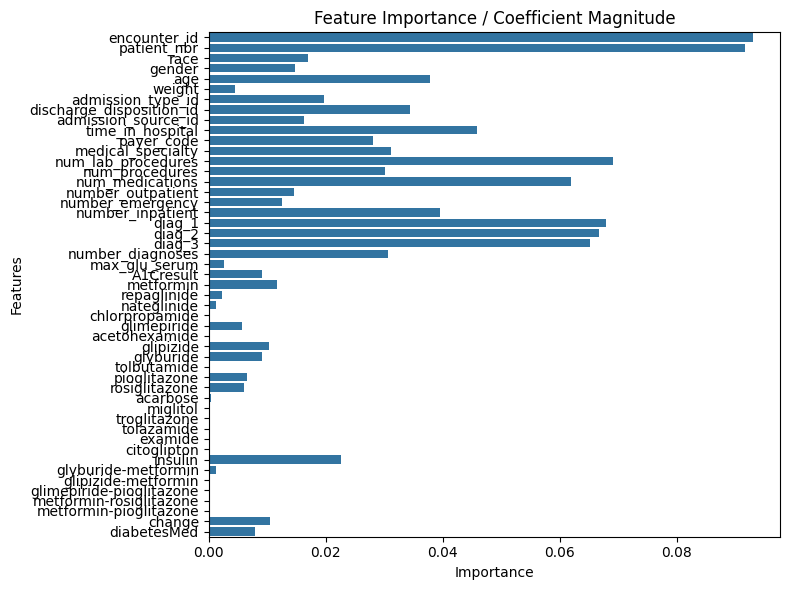


📉 Confusion Matrix:


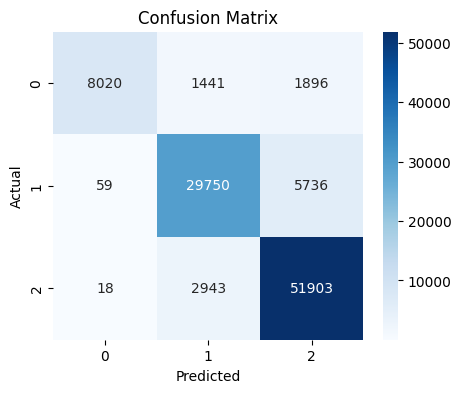


🧠 ROC Curve:


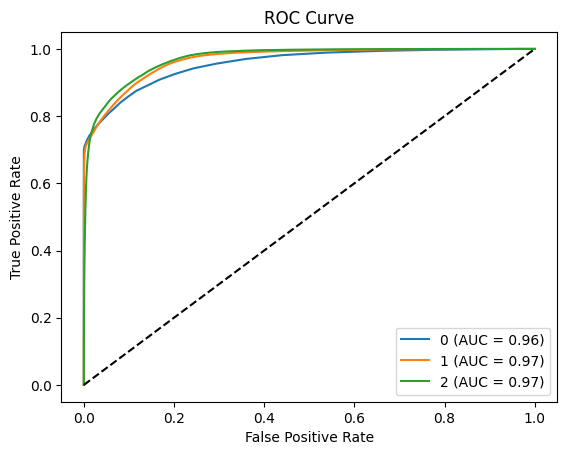

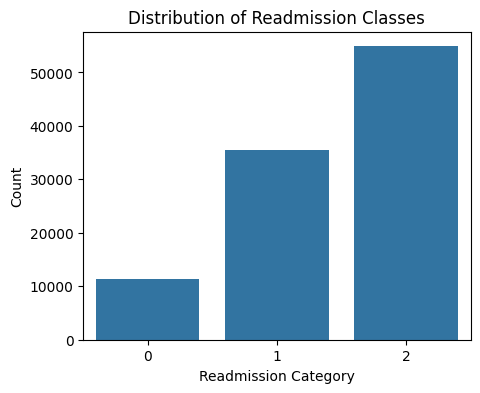


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.82     11357
           1       0.87      0.84      0.85     35545
           2       0.87      0.95      0.91     54864

    accuracy                           0.88    101766
   macro avg       0.91      0.83      0.86    101766
weighted avg       0.88      0.88      0.88    101766



In [5]:
# ==========================================
# 📊 PATIENT READMISSION VISUALIZATION
# ==========================================

# 1️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 2️⃣ Load Model and Data
print("📂 Loading model and data...")
best_model = joblib.load("readmission_model.pkl")        # model file path
scaler = joblib.load("../scaler.pkl")                   # scaler file path
df = pd.read_csv("../data/cleaned_patient_data.csv")   # cleaned dataset

# 3️⃣ Prepare Features and Target
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

print("✅ Data shape:", X.shape)
print("🎯 Target distribution:\n", y.value_counts())

# 4️⃣ Feature Importance (if available)
print("\n📊 Feature Importance:")

plt.figure(figsize=(8, 6))
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
elif hasattr(best_model, "coef_"):
    importances = np.abs(best_model.coef_[0])
else:
    importances = np.zeros(X.shape[1])  # fallback
    print("⚠️ Model does not support feature importance")

sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance / Coefficient Magnitude")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 5️⃣ Confusion Matrix Visualization
print("\n📉 Confusion Matrix:")
y_pred = best_model.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 6️⃣ ROC Curve for Binary or Multiclass
print("\n🧠 ROC Curve:")
if len(np.unique(y)) == 2:
    y_prob = best_model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob, pos_label=y.unique()[1])
    auc_score = roc_auc_score(y, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
else:
    y_bin = label_binarize(y, classes=np.unique(y))
    y_prob = best_model.predict_proba(X)
    for i, label in enumerate(np.unique(y)):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
        auc_score = roc_auc_score(y_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 7️⃣ Class Distribution Visualization
plt.figure(figsize=(5, 4))
sns.countplot(x=y)
plt.title("Distribution of Readmission Classes")
plt.xlabel("Readmission Category")
plt.ylabel("Count")
plt.show()

# 8️⃣ Print Summary Metrics
print("\n📋 Classification Report:")
print(classification_report(y, y_pred))
